In [6]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [7]:
fashion_mnist = fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
print("training set image: %d pieces" % (train_images.shape[0]))
print("test set image: %d pieces" % (test_images.shape[0]))

training set image: 60000 pieces
test set image: 10000 pieces


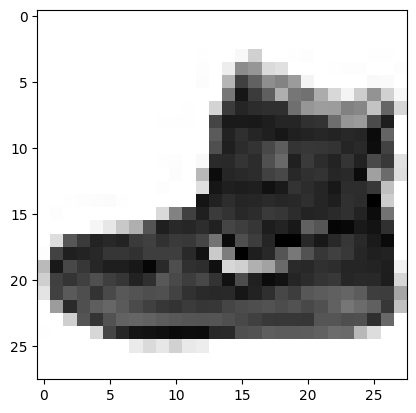

In [10]:
import matplotlib.pyplot as plt
plt.imshow(train_images[0], cmap="Greys")
plt.show()

In [11]:
X_train = train_images.reshape(train_images.shape[0], 784).astype('float32') /255
X_test = test_images.reshape(test_images.shape[0], 784).astype('float32') /255

In [12]:
Y_train = tf.keras.utils.to_categorical(train_labels, 10)
Y_test = tf.keras.utils.to_categorical(test_labels, 10)

In [18]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 
import tensorflow as tf
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [15]:
len(class_names)

10

In [16]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
modelpath = "model/{epoch:02d}-{val_loss:.4f}.keras"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

# Fit the model
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=30, batch_size=200,
                    callbacks=[early_stopping_callback, checkpointer])

# Convert history to DataFrame
hist = pd.DataFrame(history.history)

Epoch 1/30
266/300 ━━━━━━━━━━━━━━━━━━━━ 0s 954us/step - accuracy: 0.7136 - loss: 0.8490
Epoch 1: val_loss improved from inf to 0.49346, saving model to model/01-0.4935.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7232 - loss: 0.8200 - val_accuracy: 0.8284 - val_loss: 0.4935
Epoch 2/30
256/300 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step - accuracy: 0.8470 - loss: 0.4372
Epoch 2: val_loss improved from 0.49346 to 0.45827, saving model to model/02-0.4583.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8481 - loss: 0.4345 - val_accuracy: 0.8408 - val_loss: 0.4583
Epoch 3/30
272/300 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step - accuracy: 0.8625 - loss: 0.3860
Epoch 3: val_loss improved from 0.45827 to 0.43721, saving model to model/03-0.4372.keras
300/300 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3850 - val_accuracy: 0.8468 - val_loss: 0.4372
Epoch 4/30
272/300 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.8719 - loss: 0.3561
Epoch 4: val_loss improved from

    accuracy      loss  val_accuracy  val_loss
19  0.925017  0.209748        0.8765  0.355149
20  0.926517  0.205657        0.8783  0.358312
21  0.927883  0.201784        0.8789  0.358704
22  0.929750  0.197674        0.8799  0.360625
23  0.930633  0.194075        0.8802  0.360055


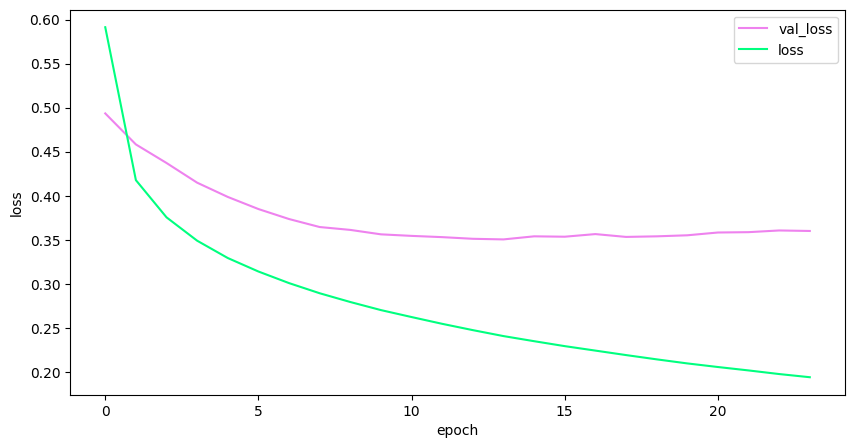

In [18]:
print(hist.tail())
y_vloss=history.history['val_loss']
# y_acc에 학습셋으로 측정한 정확도의 값을 저장
y_loss=history.history['loss']
import matplotlib.pyplot as plt
# x 값을 지정하고 정확도를 파란색으로, 오차를 빨간색으로 표시
x_len = np.arange(len(y_loss))
plt. figure(figsize=(10, 5))
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(x_len, y_vloss, "-", c="violet", markersize=3, label='val_loss')
plt.plot(x_len, y_loss, "-", c="springgreen", markersize=3, label='loss')
plt.legend()
plt.show()

In [19]:
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step - accuracy: 0.8805 - loss: 0.3583

 Test Accuracy: 0.8802
